In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
cropped_dir = 'data/train_cropped'
compressed_dir_90 = 'data/train_compressed_90'
compressed_dir_70 = 'data/train_compressed_70'
output_dir_res_5 = 'data/train_resize_5'
output_dir_res_8 = 'data/train_resize_8'
output_dir_res_15 = 'data/train_resize_15'
output_dir_res_20 = 'data/train_resize_20'
output_dir_gamma_8 = 'data/train_gamma_8'
output_dir_gamma_12 = 'data/train_gamma_12'
train_dir = 'data/train'
test_img = 'Motorola-X/(MotoX)100.jpg'

In [3]:
# Execute if generating cropped directories
def generateDirs(source, target):
    if len(os.listdir(target)) == 0:
        for cam in os.listdir(source):
            os.makedirs(os.path.join(target, cam))
        print('Generating dirs for ', target)

In [1]:
generateDirs(train_dir, cropped_dir)
generateDirs(train_dir, compressed_dir_90)
generateDirs(train_dir, compressed_dir_70)
generateDirs(train_dir, output_dir_res_5)
generateDirs(train_dir, output_dir_res_8)
generateDirs(train_dir, output_dir_res_15)
generateDirs(train_dir, output_dir_res_20)
generateDirs(train_dir, output_dir_gamma_8)
generateDirs(train_dir, output_dir_gamma_12)

NameError: name 'generateDirs' is not defined

In [5]:
# Crop photos
crop_dimension = 512
file_format = '.tif'

In [6]:
def crop(img, crop_dim):
    edge = crop_dim // 2
    height, width, _ = img.shape
    center_height = height // 2
    center_width = width // 2
    top = center_height - edge
    bottom = center_height + edge
    left = center_width - edge
    right = center_width + edge
    return img[top:bottom,left:right]

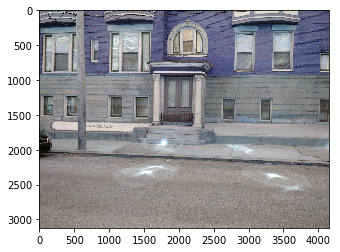

In [7]:
img = cv2.imread(os.path.join(train_dir, test_img))
plt.imshow(img)

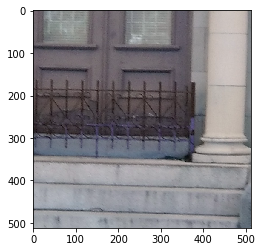

In [8]:
cropped = crop(img, crop_dimension)
plt.imshow(cropped)

In [58]:
# Generate cropped images
for source_dir in os.listdir(train_dir):
    path = os.path.join(train_dir, source_dir)
    print('Parsing files in ', path)
    for filename in os.listdir(path):
        
        img = cv2.imread(os.path.join(path, filename))
        cropped = crop(img, crop_dimension)
        cv2.imwrite(os.path.join(crop_dir, source_dir, filename[:-4] + file_format), cropped)

Parsing files in  train/HTC-1-M7
Parsing files in  train/Motorola-Droid-Maxx
Parsing files in  train/LG-Nexus-5x
Parsing files in  train/iPhone-4s
Parsing files in  train/iPhone-6
Parsing files in  train/Samsung-Galaxy-S4
Parsing files in  train/Motorola-Nexus-6
Parsing files in  train/Sony-NEX-7
Parsing files in  train/Motorola-X
Parsing files in  train/Samsung-Galaxy-Note3


In [126]:
output_dir_90 = 'data/train_compressed_90'
output_dir_70 = 'data/train_compressed_70'
output_dir_res_5 = 'data/train_resize_5'
output_dir_res_8 = 'data/train_resize_8'
output_dir_res_15 = 'data/train_resize_15'
output_dir_res_20 = 'data/train_resize_20'

In [127]:
# Generate cropped images with JPEG compression
for source_dir in os.listdir(cropped_dir):
    path = os.path.join(cropped_dir, source_dir)
    print('Parsing files in ', path)
    for filename in os.listdir(path):
        
        img = cv2.imread(os.path.join(path, filename))
        #cropped = crop(img, crop_dimension)
        cv2.imwrite(os.path.join(output_dir_90, source_dir, filename[:-4] + '.jpg'), img, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
        cv2.imwrite(os.path.join(output_dir_70, source_dir, filename[:-4] + '.jpg'), img, [int(cv2.IMWRITE_JPEG_QUALITY), 70])    

Parsing files in  train_cropped/HTC-1-M7
Parsing files in  train_cropped/Motorola-Droid-Maxx
Parsing files in  train_cropped/LG-Nexus-5x
Parsing files in  train_cropped/iPhone-4s
Parsing files in  train_cropped/iPhone-6
Parsing files in  train_cropped/Samsung-Galaxy-S4
Parsing files in  train_cropped/Motorola-Nexus-6
Parsing files in  train_cropped/Sony-NEX-7
Parsing files in  train_cropped/Motorola-X
Parsing files in  train_cropped/Samsung-Galaxy-Note3


In [128]:
# Generate resized & cropped images with JPEG compression
for source_dir in os.listdir(train_dir):
    path = os.path.join(train_dir, source_dir)
    print('Parsing files in ', path)
    for filename in os.listdir(path):        
        img = cv2.imread(os.path.join(path, filename))

        res_5 = crop(cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC), crop_dimension)
        res_8 = crop(cv2.resize(img, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_CUBIC), crop_dimension)
        res_15 = crop(cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC), crop_dimension)
        res_20 = crop(cv2.resize(img, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC), crop_dimension)
        
        cv2.imwrite(os.path.join(output_dir_res_5, source_dir, filename[:-4] + file_format), res_5)
        cv2.imwrite(os.path.join(output_dir_res_8, source_dir, filename[:-4] + file_format), res_8)
        cv2.imwrite(os.path.join(output_dir_res_15, source_dir, filename[:-4] + file_format), res_15)
        cv2.imwrite(os.path.join(output_dir_res_20, source_dir, filename[:-4] + file_format), res_20)


Parsing files in  train/HTC-1-M7
Parsing files in  train/Motorola-Droid-Maxx
Parsing files in  train/LG-Nexus-5x
Parsing files in  train/iPhone-4s
Parsing files in  train/iPhone-6
Parsing files in  train/Samsung-Galaxy-S4
Parsing files in  train/Motorola-Nexus-6
Parsing files in  train/Sony-NEX-7
Parsing files in  train/Motorola-X
Parsing files in  train/Samsung-Galaxy-Note3


In [129]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
 
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

In [132]:
# Adjust gamma
# from https://www.pyimagesearch.com/2015/10/05/opencv-gamma-correction/
gamma_table_8 = np.array([((i / 255.0) ** (1.0 / 0.8)) * 255 for i in np.arange(0, 256)]).astype("uint8")
gamma_table_12 = np.array([((i / 255.0) ** (1.0 / 1.2)) * 255 for i in np.arange(0, 256)]).astype("uint8")

In [138]:
# Generate cropped images with JPEG compression
for source_dir in os.listdir(cropped_dir):
    path = os.path.join(cropped_dir, source_dir)
    print('Parsing files in ', path)
    for filename in os.listdir(path):
        
        img = cv2.imread(os.path.join(path, filename))
        cv2.imwrite(os.path.join(output_dir_gamma_8, source_dir, filename[:-4] + file_format), cv2.LUT(img, gamma_table_8))
        cv2.imwrite(os.path.join(output_dir_gamma_12, source_dir, filename[:-4] + file_format), cv2.LUT(img, gamma_table_12))

Parsing files in  train_cropped/HTC-1-M7
Parsing files in  train_cropped/Motorola-Droid-Maxx
Parsing files in  train_cropped/LG-Nexus-5x
Parsing files in  train_cropped/iPhone-4s
Parsing files in  train_cropped/iPhone-6
Parsing files in  train_cropped/Samsung-Galaxy-S4
Parsing files in  train_cropped/Motorola-Nexus-6
Parsing files in  train_cropped/Sony-NEX-7
Parsing files in  train_cropped/Motorola-X
Parsing files in  train_cropped/Samsung-Galaxy-Note3


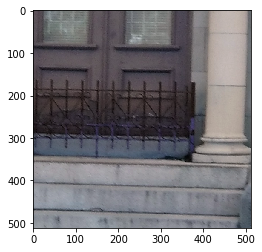

In [143]:
img = cv2.imread(os.path.join(output_dir_gamma_8, test_img[:-4] + '.tif'))
plt.imshow(img)

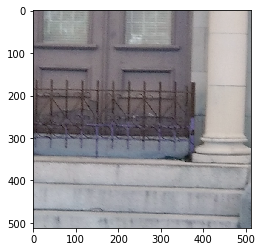

In [144]:
img = cv2.imread(os.path.join(output_dir_gamma_12, test_img[:-4] + '.tif'))
plt.imshow(img)